### EDA

In [1]:
library(cowplot) #Installing package into 'C:/Users/User/Documents/R/win-library/4.0'
library(grid)
library(ggplot2)
library(ggExtra)
library(tidyverse)
library(lubridate)
library(gridExtra)
library(tableone)

Warning message:
"package 'cowplot' was built under R version 4.0.5"
Warning message:
"package 'ggplot2' was built under R version 4.0.5"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following object is masked from 'package:cowplot':

    stamp


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [5]:
# directories
datadir = "../../DataTD"
datadir6 = "../../DataTD/validation"
cohortdir = "../../OutputTD/1_cohort"
figuredir = "../../OutputTD/Figures"
# modeldir4preadmit = "../../OutputTD/3_models/1_4_cohort_24hrpreadmit"
tabledir = "../../OutputTD/4_tables"

shc2021_outdir = "../../OutputTD/shc2021"

options(repr.matrix.max.rows=200, repr.matrix.max.cols=30)

In [9]:
or <- read.csv(file.path(shc2021_outdir, "7_cohort4_op.csv"))
nrow(or)
colnames(or)
summary(or)

[1] 60648

[1] "anon_id"                             "pat_enc_csn_id_coded"               
 [3] "admit_time"                          "label_max3"                         
 [5] "label_3hr_recent"                    "admit_label"                        
 [7] "has_admit_label"                     "died_within_24hrs"                  
 [9] "death_3hr_max_label"                 "death_3hr_recent_label"             
[11] "first_label"                         "first_label_minutes_since_admit"    
[13] "acute_to_critical_label_recent_3hr"  "critical_to_acute_label_recent_3hr" 
[15] "acute_to_critical_label_max_3hr"     "critical_to_acute_label_max_3hr"    
[17] "label_max6"                          "label_6hr_recent"                   
[19] "death_6hr_max_label"                 "death_6hr_recent_label"             
[21] "acute_to_critical_label_recent_6hr"  "critical_to_acute_label_recent_6hr" 
[23] "acute_to_critical_label_max_6hr"     "critical_to_acute_label_max_6hr"    
[25] "label_max9"                          "label_9hr_recent"                   
[27] "death_9hr_max_label"                 "death_9hr_recent_label"             
[29] "acute_to_critical_label_recent_9hr"  "critical_to_acute_label_recent_9hr" 
[31] "acute_to_critical_label_max_9hr"     "critical_to_acute_label_max_9hr"    
[33] "label_max12"                         "label_12hr_recent"                  
[35] "death_12hr_max_label"                "death_12hr_recent_label"            
[37] "acute_to_critical_label_recent_12hr" "critical_to_acute_label_recent_12hr"
[39] "acute_to_critical_label_max_12hr"    "critical_to_acute_label_max_12hr"   
[41] "label_max24"                         "label_24hr_recent"                  
[43] "death_24hr_max_label"                "death_24hr_recent_label"            
[45] "acute_to_critical_label_recent_24hr" "critical_to_acute_label_recent_24hr"
[47] "acute_to_critical_label_max_24hr"    "critical_to_acute_label_max_24hr"

   anon_id          pat_enc_csn_id_coded  admit_time          label_max3    
 Length:60648       Min.   :1.311e+11    Length:60648       Min.   :0.0000  
 Class :character   1st Qu.:1.312e+11    Class :character   1st Qu.:0.0000  
 Mode  :character   Median :1.313e+11    Mode  :character   Median :0.0000  
                    Mean   :1.312e+11                       Mean   :0.1162  
                    3rd Qu.:1.313e+11                       3rd Qu.:0.0000  
                    Max.   :1.313e+11                       Max.   :1.0000  
                                                                            
 label_3hr_recent  admit_label     has_admit_label  died_within_24hrs 
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.000000  
 Median :0.0000   Median :0.0000   Median :1.0000   Median :0.000000  
 Mean   :0.1131   Mean   :0.1088   Mean   :0.9914   Mean   :0.001501  
 3rd Qu.:0.0000   3rd Qu.:0.0

In [8]:
head(or, 1)

,anon_id,pat_enc_csn_id_coded,admit_time,label_max3,label_3hr_recent,admit_label,has_admit_label,died_within_24hrs,death_3hr_max_label,death_3hr_recent_label,first_label,first_label_minutes_since_admit,acute_to_critical_label_recent_3hr,critical_to_acute_label_recent_3hr,acute_to_critical_label_max_3hr,⋯,label_12hr_recent,death_12hr_max_label,death_12hr_recent_label,acute_to_critical_label_recent_12hr,critical_to_acute_label_recent_12hr,acute_to_critical_label_max_12hr,critical_to_acute_label_max_12hr,label_max24,label_24hr_recent,death_24hr_max_label,death_24hr_recent_label,acute_to_critical_label_recent_24hr,critical_to_acute_label_recent_24hr,acute_to_critical_label_max_24hr,critical_to_acute_label_max_24hr
,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,JC1000116,131066472308,2015-01-28 00:46:00,0,0,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
cohort <- read.csv(file.path(shc2021_outdir, "7_cohort4_3hr_labels_noOR.csv"))
nrow(cohort)
summary(cohort)

[1] 52532

   anon_id          pat_enc_csn_id_coded  admit_time          label_max3    
 Length:52532       Min.   :1.311e+11    Length:52532       Min.   :0.0000  
 Class :character   1st Qu.:1.312e+11    Class :character   1st Qu.:0.0000  
 Mode  :character   Median :1.313e+11    Mode  :character   Median :0.0000  
                    Mean   :1.312e+11                       Mean   :0.1142  
                    3rd Qu.:1.313e+11                       3rd Qu.:0.0000  
                    Max.   :1.313e+11                       Max.   :1.0000  
                                                                            
 label_3hr_recent  admit_label     has_admit_label  died_within_24hrs 
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.000000  
 Median :0.0000   Median :0.0000   Median :1.0000   Median :0.000000  
 Mean   :0.1114   Mean   :0.1078   Mean   :0.9927   Mean   :0.001485  
 3rd Qu.:0.0000   3rd Qu.:0.0

In [19]:
dx21 <- read.csv(file.path(datadir6, "diagnosis_2021.csv")) # %>% mutate(admit_time = ymd_hms(admit_time))
nrow(dx21)

dx <- read.csv(file.path(datadir, "diagnosis.csv")) # %>% mutate(admit_time = ymd_hms(admit_time))
nrow(dx)

dept21 <- read.csv(file.path(datadir6, "dept_2021.csv")) 
nrow(dept21)

dept <- read.csv(file.path(datadir, "dept.csv")) 
nrow(dept)

[1] 1014875

[1] 1344472

[1] 313455

[1] 851989

In [20]:
head(dx)

,dx_name,icd10
,<chr>,<chr>
1,Type 1 diabetes mellitus with hypoglycemia without coma,E10.649
2,Type 1 diabetes mellitus with hyperglycemia,E10.65
3,Other specified postprocedural states,Z98.890
4,"Lisfranc dislocation, left, initial encounter",S93.325A
5,Long term (current) use of insulin,Z79.4
6,Type 1 diabetes mellitus with ketoacidosis without coma,E10.10


In [21]:
head(dept)

,dept_id,dept_name
,<int>,<chr>
1,2000231,B3
2,2001002,PEDIATRIC EMERGENCY DEPARTMENT
3,2000231,B3
4,2000231,B3
5,2001002,PEDIATRIC EMERGENCY DEPARTMENT
6,2001002,PEDIATRIC EMERGENCY DEPARTMENT


In [22]:
dept %>% group_by(dept_id, dept_name) %>% summarize(n=n()) %>% arrange(n)

`summarise()` regrouping output by 'dept_id' (override with `.groups` argument)



dept_id,dept_name,n
<int>,<chr>,<int>
120201007,VCP PEDIATRICS,4
1107301002,CATH AMC,8
7101005,ASC SHORT STAY,13
117301007,CATH AMC PRE-OP,18
20026201,D2ICU-SURGE,23
6001000,500P INTERVENTIONAL PLATFORM,26
120201002,VCP 2 NORTH,31
7301007,ZZCATH ASC PRE-OP,32
120201021,VCP SURGERY,38


In [23]:
dept %>% group_by(dept_id, dept_name) %>% summarize(n=n()) %>% arrange(dept_id)

`summarise()` regrouping output by 'dept_id' (override with `.groups` argument)



dept_id,dept_name,n
<int>,<chr>,<int>
2000211,B1,21491
2000222,G2P,21358
2000224,C2,20927
2000231,B3,42053
2000232,FGR,28749
2000233,H1,27182
2000237,B2,35277
2000238,F3,16536
2000241,D2,7096


In [24]:
dept %>% group_by(dept_id, dept_name) %>% summarize(n=n()) %>% arrange(dept_name)

`summarise()` regrouping output by 'dept_id' (override with `.groups` argument)



dept_id,dept_name,n
<int>,<chr>,<int>
6001000,500P INTERVENTIONAL PLATFORM,26
6001002,500P INTRA-OP,1540
6001003,500P PACU,1199
6001001,500P PRE-OP,542
110100019,ADULT EMERGENCY DEPARTMENT,16283
7101000,AMBULATORY SURGERY CENTER,214
7101002,ASC INTRA-OP,1406
7101003,ASC PACU,3003
7101001,ASC PRE-OP,1928


In [28]:
# pat <-  paste0("^(", paste(code_list, collapse = "|"), ")")
dx %>% group_by(dx_name, icd10) %>% summarize(n=n()) %>% filter(str_detect(icd10, "^E11.")) %>% arrange(icd10)

`summarise()` regrouping output by 'dx_name' (override with `.groups` argument)



dx_name,icd10,n
<chr>,<chr>,<int>
Diabetes mellitus with hyperosmolarity (CMS-HCC),E11.00,1
Diabetes mellitus with hyperosmolarity without hyperglycemic hyperosmolar nonketotic coma (CMS-HCC),E11.00,1
Diabetic hyperosmolar non-ketotic state (CMS-HCC),E11.00,18
Hyperosmolar non-ketotic state in patient with type 2 diabetes mellitus (CMS-HCC),E11.00,14
Type 2 diabetes mellitus with hyperosmolar nonketotic hyperglycemia (CMS-HCC),E11.00,5
Type 2 diabetes mellitus with hyperosmolarity without coma (CMS-HCC),E11.00,4
"Type 2 diabetes mellitus with hyperosmolarity without coma, unspecified long term insulin use status",E11.00,12
"Type 2 diabetes mellitus with hyperosmolarity without coma, unspecified whether long term insulin use (CMS-HCC)",E11.00,8
"Type 2 diabetes mellitus with hyperosmolarity without coma, without long-term current use of insulin (CMS-HCC)",E11.00,37


In [33]:
dx %>% group_by(dx_name, icd10) %>% filter(str_detect(dx_name, "ketoacidosis")) %>% summarize(n=n()) %>% arrange(-n)

`summarise()` regrouping output by 'dx_name' (override with `.groups` argument)



dx_name,icd10,n
<chr>,<chr>,<int>
Type 1 diabetes mellitus with ketoacidosis without coma,E10.10,317
Diabetic ketoacidosis without coma associated with type 1 diabetes mellitus (CMS-HCC),E10.10,193
Type 2 diabetes mellitus with ketoacidosis without coma,E11.10,174
Diabetic ketoacidosis without coma associated with type 2 diabetes mellitus (CMS-HCC),E11.10,123
Diabetic ketoacidosis without coma associated with diabetes mellitus due to underlying condition (CMS-HCC),E08.10,85
Other specified diabetes mellitus with ketoacidosis without coma,E13.10,80
"Type II or unspecified type diabetes mellitus with ketoacidosis, uncontrolled(250.12)",E13.10,80
"Type II or unspecified type diabetes mellitus with ketoacidosis, not stated as uncontrolled",E11.10,76
"Type I (juvenile type) diabetes mellitus with ketoacidosis, not stated as uncontrolled(250.11)",E10.10,59


### Plots

In [36]:
# plot the positive/negative labels by time in ED

# maindir <- "D:/school/triage/"
# datadir <- "OutputTD/5_results_analysis/"

# read in the labels across different time points
# labels_file <- paste0(maindir, datadir, "5_4_time_range_labels.csv")
labels <- read.csv(file.path(shc2021_outdir, "5_4_time_range_labels.csv")) 
head(labels)
dim(labels)

# get total number of csns
csns_length <- length(unique(labels$pat_enc_csn_id_coded))
csns_length

# select label columns and make long
cleaned_labels <- labels %>%
  select(anon_id, pat_enc_csn_id_coded, contains('label_'))

# count the number of transfers for each hour
hours <- 1:47
hour <- 1
count_transfers <- function(hour){
  head(cleaned_labels)
  curr_label <- paste0("label_", hour, 'hr')
  last_label <- paste0('label_', hour-1, 'hr')
  curr_label
  last_label
  
  # count positive transfers
  # curr_label == 1 and last_label == 0
  pos_count <- sum(cleaned_labels[curr_label] - cleaned_labels[last_label] == 1)
  pos_count
  
  # count negative transfers
  # curr_label == 0 and last_label == 1
  neg_count <- sum(cleaned_labels[curr_label] - cleaned_labels[last_label] == -1)
  neg_count
  
  data.frame(hour=hour, positive=pos_count, negative=neg_count)
}

all_counts <- lapply(hours, count_transfers)
counts_df <- do.call(rbind, all_counts)
counts_df


cleaned_labels <- labels %>%
  select(anon_id, pat_enc_csn_id_coded, contains('label_')) %>%
  filter(label_0hr == 0) %>%
  gather('hour', 'label', -anon_id, -pat_enc_csn_id_coded) %>%
  filter(hour != 'label_0hr') %>%
  mutate(hour=str_remove(hour, 'label_')) %>%
  mutate(hour=str_remove(hour, "hr"))
head(cleaned_labels)



# count the types of labels per hour
label_counts <- cleaned_labels %>%
  filter(label==1) %>%
  group_by(hour) %>%
  summarise(positive=sum(label)) %>%
  mutate(negative=csns_length - positive)
  # gather('label_type', 'count', -hour)
head(label_counts)


,X,anon_id,pat_enc_csn_id_coded,admit_time_x,label_0hr,admit_time_y,label_1hr,admit_time_x.1,label_2hr,admit_time_y.1,label_3hr,admit_time_x.2,label_4hr,admit_time_y.2,label_5hr,...,label_40hr,admit_time_y.20,label_41hr,admit_time_x.21,label_42hr,admit_time_y.21,label_43hr,admit_time_x.22,label_44hr,admit_time_y.22,label_45hr,admit_time_x.23,label_46hr,admit_time_y.23,label_47hr
,<int>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,...,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>
1,0,JC2a0efc1,131280575648,2019-12-06 07:22:00+00:00,0,2019-12-06 07:22:00+00:00,0,2019-12-06 07:22:00+00:00,0,2019-12-06 07:22:00+00:00,0,2019-12-06 07:22:00+00:00,0,2019-12-06 07:22:00+00:00,0,...,0,2019-12-06 07:22:00+00:00,0,2019-12-06 07:22:00+00:00,0,2019-12-06 07:22:00+00:00,0,2019-12-06 07:22:00+00:00,0,2019-12-06 07:22:00+00:00,0,2019-12-06 07:22:00+00:00,0,2019-12-06 07:22:00+00:00,0
2,1,JCcd7ba7,131277369526,2019-10-31 10:46:00+00:00,0,2019-10-31 10:46:00+00:00,0,2019-10-31 10:46:00+00:00,0,2019-10-31 10:46:00+00:00,0,2019-10-31 10:46:00+00:00,0,2019-10-31 10:46:00+00:00,0,...,0,2019-10-31 10:46:00+00:00,0,2019-10-31 10:46:00+00:00,0,2019-10-31 10:46:00+00:00,0,2019-10-31 10:46:00+00:00,0,2019-10-31 10:46:00+00:00,0,2019-10-31 10:46:00+00:00,0,2019-10-31 10:46:00+00:00,0
3,2,JCdc0a60,131281229519,2020-01-17 22:12:00+00:00,0,2020-01-17 22:12:00+00:00,0,2020-01-17 22:12:00+00:00,0,2020-01-17 22:12:00+00:00,0,2020-01-17 22:12:00+00:00,0,2020-01-17 22:12:00+00:00,0,...,0,2020-01-17 22:12:00+00:00,0,2020-01-17 22:12:00+00:00,0,2020-01-17 22:12:00+00:00,0,2020-01-17 22:12:00+00:00,0,2020-01-17 22:12:00+00:00,0,2020-01-17 22:12:00+00:00,0,2020-01-17 22:12:00+00:00,0
4,3,JCe9a058,131176512588,2016-02-29 23:57:00+00:00,0,2016-02-29 23:57:00+00:00,0,2016-02-29 23:57:00+00:00,0,2016-02-29 23:57:00+00:00,0,2016-02-29 23:57:00+00:00,0,2016-02-29 23:57:00+00:00,0,...,0,2016-02-29 23:57:00+00:00,0,2016-02-29 23:57:00+00:00,0,2016-02-29 23:57:00+00:00,0,2016-02-29 23:57:00+00:00,0,2016-02-29 23:57:00+00:00,0,2016-02-29 23:57:00+00:00,0,2016-02-29 23:57:00+00:00,0
5,4,JCe8848f,131100334492,2015-07-22 04:00:00+00:00,0,2015-07-22 04:00:00+00:00,0,2015-07-22 04:00:00+00:00,0,2015-07-22 04:00:00+00:00,0,2015-07-22 04:00:00+00:00,0,2015-07-22 04:00:00+00:00,0,...,0,2015-07-22 04:00:00+00:00,0,2015-07-22 04:00:00+00:00,0,2015-07-22 04:00:00+00:00,0,2015-07-22 04:00:00+00:00,0,2015-07-22 04:00:00+00:00,0,2015-07-22 04:00:00+00:00,0,2015-07-22 04:00:00+00:00,0
6,5,JCd015d9,131179245939,2016-02-16 04:24:00+00:00,0,2016-02-16 04:24:00+00:00,0,2016-02-16 04:24:00+00:00,0,2016-02-16 04:24:00+00:00,0,2016-02-16 04:24:00+00:00,0,2016-02-16 04:24:00+00:00,0,...,0,2016-02-16 04:24:00+00:00,0,2016-02-16 04:24:00+00:00,0,2016-02-16 04:24:00+00:00,0,2016-02-16 04:24:00+00:00,0,2016-02-16 04:24:00+00:00,0,2016-02-16 04:24:00+00:00,0,2016-02-16 04:24:00+00:00,0


[1] 43979    99

[1] 43979

hour,positive,negative
<int>,<int>,<int>
1,4858,0
2,126,0
3,101,0
4,94,0
5,85,0
6,61,0
7,64,0
8,56,0
9,41,0


,anon_id,pat_enc_csn_id_coded,hour,label
,<chr>,<dbl>,<chr>,<int>
1,JC2a0efc1,131280575648,1,0
2,JCcd7ba7,131277369526,1,0
3,JCdc0a60,131281229519,1,0
4,JCe9a058,131176512588,1,0
5,JCe8848f,131100334492,1,0
6,JCd015d9,131179245939,1,0


`summarise()` ungrouping output (override with `.groups` argument)



hour,positive,negative
<chr>,<int>,<int>
1,4858,39121
10,5527,38452
11,5558,38421
12,5580,38399
13,5601,38378
14,5633,38346


In [44]:
# adjust hour factor
unique(label_counts$hour)
label_counts_hr <- label_counts %>% mutate(hour = as.numeric(hour)) %>% filter(hour < 25)
unique(label_counts_hr$hour)

label_counts_hr$hour <- factor(label_counts_hr$hour, levels=1:24)
# head(label_counts_hr)

[1] "1"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "2"  "20" "21" "22"
[16] "23" "24" "25" "26" "27" "28" "29" "3"  "30" "31" "32" "33" "34" "35" "36"
[31] "37" "38" "39" "4"  "40" "41" "42" "43" "44" "45" "46" "47" "5"  "6"  "7" 
[46] "8"  "9"

[1]  1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24  3  4  5  6  7  8  9

In [45]:
# label_counts$label_type <- factor(label_counts$label_type,
#                                   levels=c('positive', 'negative'))
label_counts_long <- gather(label_counts_hr, label_type, counts, positive:negative, factor_key=TRUE)
label_counts_long %>% arrange(hour, label_type)
nrow(label_counts_long)

hour,label_type,counts
<fct>,<fct>,<int>
1,positive,4858
1,negative,39121
2,positive,4984
2,negative,38995
3,positive,5085
3,negative,38894
4,positive,5179
4,negative,38800
5,positive,5264


[1] 48

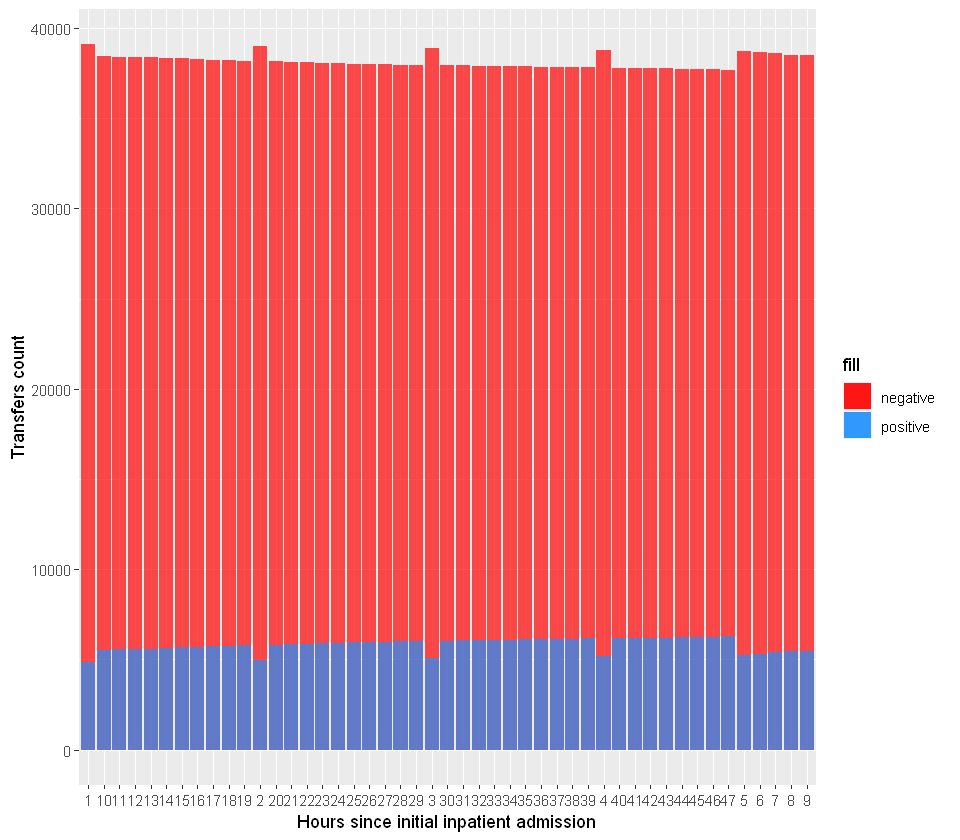

In [52]:
options(repr.plot.width=8, repr.plot.height=7)

colors <- c('negative'='red', 'positive'='dodgerblue1')

ggplot(label_counts) +
  geom_bar(aes(x=hour, y=negative, fill='negative',), 
                 stat='identity', position='identity',
           alpha=0.7) +
  geom_bar(aes(x=hour, y=positive, fill='positive',), 
           stat='identity', position='identity',
           alpha=0.7) +
  labs(x='Hours since initial inpatient admission', 
       y='Transfers count') +
  scale_fill_manual(values=colors)
  
  

# ggplot(label_counts_long, aes(x = hour, fill = label_type)) + 
#   geom_histogram(position = "identity", alpha = 0.2) +
#   labs(title = "Overlapping Histograms of Predicted Risks\n", 
#        x = "Predicted probability", y = "Frequency") +
#   scale_fill_discrete(name = "Prediction times\n", labels = c("t0", "t24")) +
#   #     scale_color_manual(labels = c("Initial Admission", "24th hour after"), values = c("blue", "red")) +
#   theme(axis.text = element_text(size=14),
#         plot.title = element_text(size=16, hjust=0.5),
#         axis.title = element_text(size=16), legend.key.size = unit(1, "cm"), 
#         legend.text=element_text(size=13), legend.title=element_text(size=13))#, face="bold"

# ggsave(filename = file.path(figuredir, "Fig_trends.png"), width = 8, height = 7, dpi = 1200)

,X,positive,negative
,<chr>,<int>,<int>
1,label_switch_1hr,96,45
2,label_switch_2hr,111,53
3,label_switch_3hr,99,51
4,label_switch_4hr,88,59
5,label_switch_5hr,82,56
6,label_switch_6hr,62,58


,hour,label_type,count
,<chr>,<chr>,<int>
1,1,positive,96
2,2,positive,111
3,3,positive,99
4,4,positive,88
5,5,positive,82
6,6,positive,62


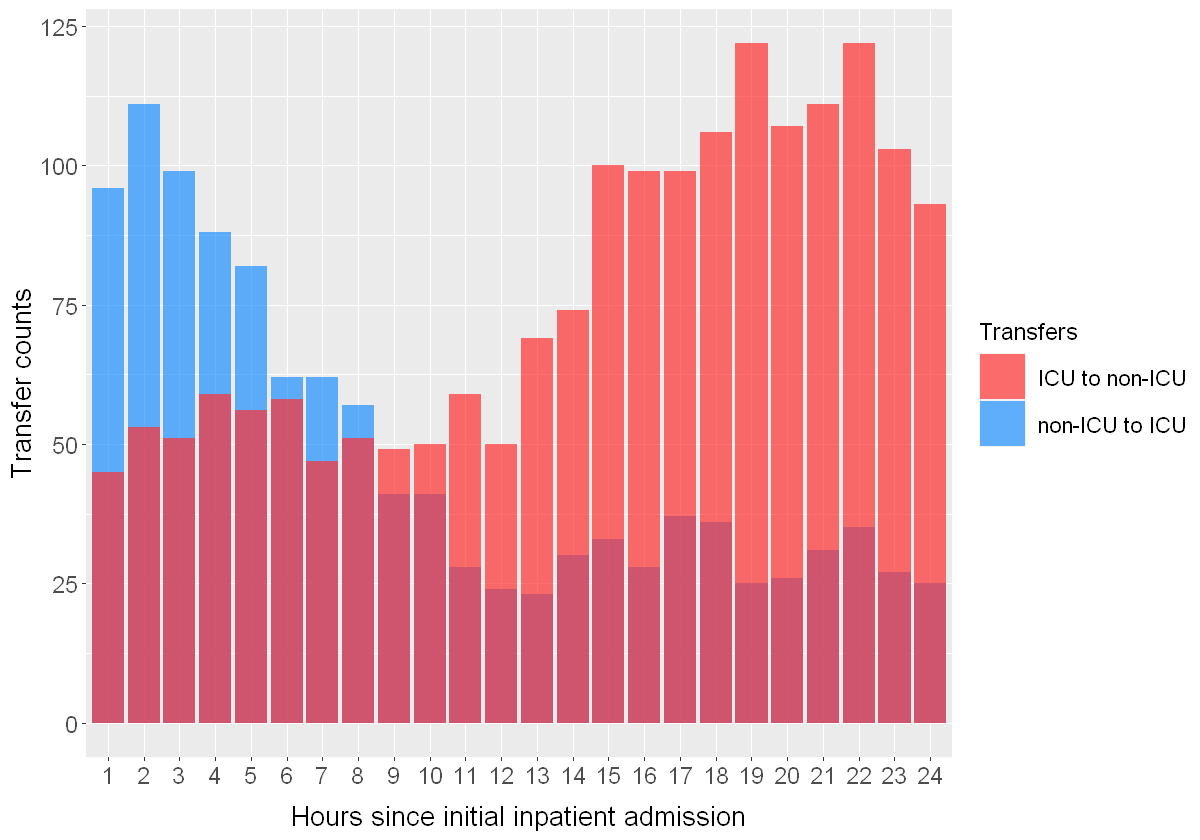

In [69]:
counts <- read.csv(file.path(shc2021_outdir, "5_4_pos_neg_switch_count_per_hour.csv")) 
head(counts)

names(counts)[1] <- 'label'

# format the data
label_counts <- counts %>%
  mutate(hour = str_remove(label, "label_switch_")) %>%
  mutate(hour = str_remove(hour, "hr")) %>%
  select(-label) %>%
  gather('label_type', 'count', -hour)
head(label_counts)

label_counts$hour <- factor(label_counts$hour,
                            levels=1:24)

options(repr.plot.width=10, repr.plot.height=7)


colors <- c('negative'='firebrick1', 'positive'='dodgerblue1')

ggplot(label_counts) +
  geom_bar(aes(x=hour, y=count, fill=label_type), 
           stat='identity', position='identity',
           alpha=0.7) +
  labs(
    # title = "Overlapping Histograms of Transfers per Hour\n", 
       x = "Hours since initial inpatient admission", 
       y = "Transfer counts") +
  scale_fill_manual(values=colors, labels = c("ICU to non-ICU", "non-ICU to ICU")) +
   theme(axis.text = element_text(size=14),
        # plot.title = element_text(size=16, hjust=0.5),
        axis.title = element_text(size=16), legend.key.size = unit(1, "cm"),
        axis.title.x = element_text(margin = margin(t = 10, r =0 , b = 0, l = 0)),
#         legend.position="none", 
        legend.text= element_text(size=13), legend.title=element_text(size=14)) + #, face="bold" 
  guides(fill=guide_legend(title="Transfers"))

# ggsave(filename = file.path(figuredir, "Fig_trends_notitle_nolegend.png"), width = 8, height = 7, dpi = 1200)

ggsave(filename = file.path(figuredir, "Fig_trends_notitle.png"), width = 10, height = 7, dpi = 1200)
